In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
all_data = pd.read_csv('all_data_master.csv')
all_data = all_data.replace('\\N', np.nan)

• For problems 1 to 6 use all_data, so do not change this data frame at any point <br>
• For problems that ask to order by a variable always use ascending order unless stated otherwise <br>
• For problem 6 the overall median is the median of all salaries in all_data <br>
• For problem 7 and 8 import csv files core_data and salary_grid into data frames employee and salary respectively. 
From employee drop rows where all fields are null (Carries credit) <br>
• In-line comments are preferred for this assignment but not mandatory <br>
• No explanations are expected at the end of answers, unless requested

### 1. Display total number of job postings in each year. Print the year that had most jobs. Plot a simple line graph to see if jobs rise with each passing year.

In [3]:
jobsByYear = all_data.assign(year=all_data['post_date'].str[:4]).groupby('year').count()

In [4]:
jobsByYear.rename(columns={'job_id' : 'number of job postings'}, inplace=True)

In [5]:
# Display total number of job postings in each year
jobsByYear[['number of job postings']]

,number of job postings
year,
2016,178959
2017,492704
2018,228337


In [6]:
# Print the year that had most jobs
print(jobsByYear[jobsByYear['number of job postings'] == jobsByYear['number of job postings'].max()].index.values[0])

2017


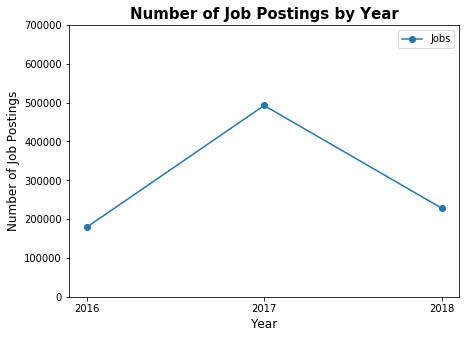

In [7]:
# Plot a simple line graph to see if jobs rise with each passing year
fig, ax = plt.subplots(figsize=(7, 5))

plt.plot(jobsByYear['number of job postings'], marker='o')
plt.title('Number of Job Postings by Year', fontsize=15, fontweight='bold')
plt.ylabel('Number of Job Postings', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.ylim((0, 700000))
plt.legend(['Jobs']);

### 2. Display mean salary per year for the company Wells Fargo in a single data frame (company, year, mean_salary). Plot a graph to determine whether Wells Fargo mean salaries are on the rise with every passing year.

In [8]:
data = all_data.assign(year=all_data['post_date'].str[:4])

In [9]:
# Display mean salary per year for the company Wells Fargo in a single data frame (company, year, mean_salary)
wellsFargo = data.groupby(['company', 'year']).mean().xs('Wells Fargo', drop_level=False)
wellsFargo

salary
company     year               
Wells Fargo 2016   92093.251870
            2017   98633.945170
            2018  103706.963136

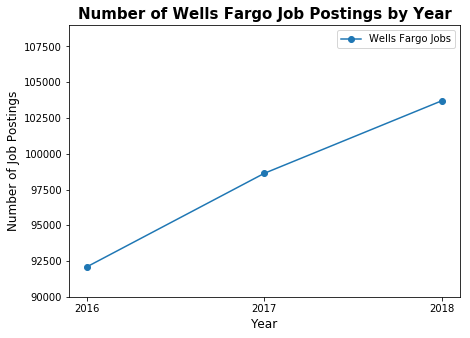

In [10]:
# Plot a graph to determine whether Wells Fargo mean salaries are on the rise with every passing year.
fig, ax = plt.subplots(figsize=(7, 5))

plt.plot(wellsFargo.unstack(level=0), marker='o')
plt.title('Number of Wells Fargo Job Postings by Year', fontsize=15, fontweight='bold')
plt.ylabel('Number of Job Postings', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.ylim((90000, 109000))
plt.legend(['Wells Fargo Jobs']);

### 3. Display standard deviation in salaries for the states AZ, TX and DC in descending order. Now visualize this data in a bar chart.

In [11]:
# Display standard deviation in salaries for the states AZ, TX and DC in descending order.
stdOfTri = all_data.groupby('state').std().loc[['AZ', 'TX', 'DC']].sort_values(by=['salary'], ascending=False)
stdOfTri

,salary
state,
TX,32920.641678
AZ,31543.331523
DC,29379.924282


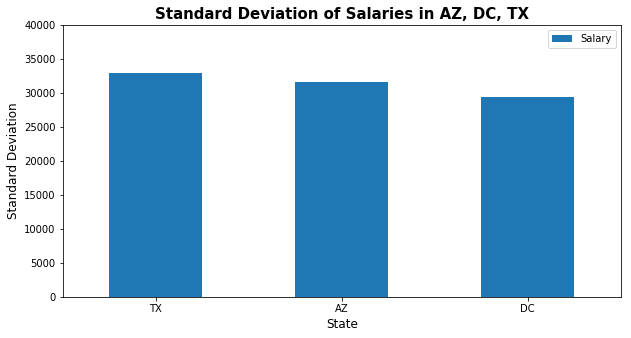

In [12]:
# Now visualize this data in a bar chart.
stdOfTri.reset_index().plot(x='state', y='salary', kind='bar', figsize=(10, 5))

plt.title('Standard Deviation of Salaries in AZ, DC, TX', fontsize=15, fontweight='bold')
plt.ylabel('Standard Deviation', fontsize=12)
plt.xlabel('State', fontsize=12)
plt.ylim((0, 40000))
plt.xticks(rotation=360)
plt.legend(['Salary']);

### 4. Display all_data without those states that have less than 1000 job postings. Final data frame must include all columns as the original data frame.

In [28]:
all_data.groupby('state').filter(lambda x: x['job_id'].count() > 1000)

,job_id,vertical,company,post_date,fill_date,time_to_fill,salary,location,city,state,zip,county,region_state,latitude,longitude
1,8895868916034283132954081837418,Information Technology,Medtronic,2018-04-20,NaN,NaN,98222,"Northridge, CA",Northridge,CA,91324,Los Angeles,"Los Angeles-Long Beach-Santa Ana, CA MSA",34.236698150634766,-118.5469970703125
4,490138684948094100363899533762,Information Technology,Mindteck,2018-02-20,2018-02-20,0,84921,"Research Triangle Park, NC",Research Triangle Park,NC,27709,Durham,"Durham, NC MSA",36.05120086669922,-78.85769653320312
5,74657902746882254946742123272434,Information Technology,Erickson Living,2016-10-13,2016-11-19,37,91550,"Catonsville, MD",Catonsville,MD,21228,Baltimore,"Baltimore-Towson, MD MSA",39.2781982421875,-76.74009704589844
7,62960553541696238196645947323426,Information Technology,Rockwell Automation,2018-04-26,NaN,NaN,56453,"Milwaukee, WI",Milwaukee,WI,53201,Milwaukee,"Milwaukee-Waukesha-West Allis, WI MSA",43.01129913330078,-87.9583969116211
14,84400929153273312343387471187380,Information Technology,AstraZeneca,2017-10-20,NaN,NaN,109380,"Newark, DE",Newark,DE,19702,New Castle,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA",39.6348991394043,-75.69930267333984
15,85635281146142691616550336984711,Information Technology,ServiceNow,2017-07-29,NaN,NaN,109559,"Santa Clara, CA 95054",Santa Clara,CA,95054,Santa Clara,"San Jose-Sunnyvale-Santa Clara, CA MSA",37.392398834228516,-121.96199798583984
19,3279253277042684868358283051090,Information Technology,WakeMed,2018-07-20,NaN,NaN,36773,"Raleigh, NC 27601 (Central area)",Raleigh,NC,27601,Wake,"Raleigh-Cary, NC MSA",35.772701263427734,-78.63240051269531
20,54747967645865705868895399685056,Information Technology,KDDI America,2018-07-21,NaN,NaN,73161,"Bensenville, IL 60106",Bensenville,IL,60106,DuPage,"Chicago-Naperville-Joliet, IL-IN-WI MSA",41.95009994506836,-87.94499969482422
21,22358427127369679660955944836895,Information Technology,XPO Logistics,2018-01-06,NaN,NaN,54085,"Greenwich, CT 06831",Greenwich,CT,06831,Fairfield,"Bridgeport-Stamford-Norwalk, CT MSA",41.054901123046875,-73.6594009399414
23,73008818513451263769918234460534,Information Technology,Weidenhammer Systems,2017-12-19,NaN,NaN,114036,"Wayne, PA 19087",Wayne,PA,19087,Delaware,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA",40.06119918823242,-75.39990234375


### 5. For each state, find the company that posted the job with highest salary (among all job postings in that state alone). Final data frame must have columns job_id, company, salary. There will be only one record per state.

In [14]:
all_data.loc[all_data.groupby('state')['salary'].idxmax()][['job_id', 'company','salary', 'state']].set_index('state')

,job_id,company,salary
state,,,
AK,6254554697961903021729541697906,Alaska Native Tribal Health Consortium,150201
AL,52455594142608291393736726904349,Vohra Wound Physicians,265055
AR,83850550581411763915423221347634,"CHSPSC, LLC",215712
AZ,14391139931412242253270633239859,Colorado Insurance,275492
CA,32142709459365623325469028463764,Rager Resources,268975
CO,43127069182395076181633154363134,Colorado Insurance,274218
CT,6698697560406259107037224133085,Synchrony Financial,221750
DC,68724580395799599172606139890429,Charles Levick,274653
DE,43450670787950726362335281731549,JP Morgan Chase,210975


### 6. Display all_data without those companies whose highest salary was lower than the overall median. Final data frame must include all columns of the original data frame.

In [15]:
salaryMedian = all_data['salary'].median()

In [16]:
salaryMedian

67438.0

In [17]:
companiesAboveMedian = all_data.loc[all_data['salary'] > salaryMedian]

In [18]:
companiesAboveMedian.loc[companiesAboveMedian.groupby('company')['salary'].idxmax()]

,job_id,vertical,company,post_date,fill_date,time_to_fill,salary,location,city,state,zip,county,region_state,latitude,longitude
135486,20136521428894285403758141519623,Information Technology,#twiceasnice Recruiting,2018-01-26,NaN,NaN,77651,"New Haven, CT",New Haven,CT,06501,New Haven,"New Haven-Milford, CT MSA",41.365699768066406,-72.92749786376953
652390,94050426121336937851719056184872,Information Technology,&pizza,2018-03-30,NaN,NaN,79779,"Washington, DC",Washington,DC,20001,District of Columbia,"Washington-Arlington-Alexandria, DC-VA-MD-WV MSA",38.912200927734375,-77.0177001953125
254507,19932684981385713089480760058323,Information Technology,'Confidential Healthcare Company',2016-09-29,2016-10-01,2,141429,"Sacramento, CA",Sacramento,CA,94203,Sacramento,"Sacramento-Arden-Arcade-Roseville, CA MSA",38.38050079345703,-121.55500030517578
55128,97093826167995659271635113183062,Information Technology,'ike Group,2018-03-14,NaN,NaN,101959,"Honolulu, HI",Honolulu,HI,96801,Honolulu,"Honolulu, HI MSA",24.859800338745117,-168.02200317382812
819895,64797410958585438490049036926824,Information Technology,.Confidential.,2017-11-21,NaN,NaN,90246,"St. Louis, MO 63146",Saint Louis,MO,63146,Saint Louis,"St. Louis, MO-IL MSA",38.70330047607422,-90.46179962158203
752981,16289133851754057700963029521936,Information Technology,".Honduras, Soto Cano Airbase",2017-02-25,NaN,NaN,96573,"Top, PA",Top,PA,NaN,NaN,NaN,NaN,NaN
502852,86773690213635924649689068393680,Information Technology,001 Safeway Inc,2017-01-28,2017-02-07,10,114300,"Pleasanton, CA",Pleasanton,CA,94566,Alameda,"San Francisco-Oakland-Fremont, CA MSA",37.66579818725586,-121.8759994506836
466631,930850726517458533320718710802,Information Technology,0104 Equinix LLC,2017-05-30,NaN,NaN,81604,"Chicago, IL 60616 (Douglas area)",Chicago,IL,60616,Cook,"Chicago-Naperville-Joliet, IL-IN-WI MSA",41.84260177612305,-87.63059997558594
241175,1645868991853224989005673890609,Information Technology,02 Denny's Inc.,2018-03-06,NaN,NaN,93146,"Spartanburg, SC 29319",Spartanburg,SC,29319,Spartanburg,"Spartanburg, SC MSA",34.88819885253906,-81.96900177001953
493551,65522114327982566742494138729940,Information Technology,041-Concentra Solutions Inc (Concentra),2016-11-08,2016-12-20,42,101921,"Addison, TX",Addison,TX,75001,Dallas,"Dallas-Fort Worth-Arlington, TX MSA",32.959999084472656,-96.8385009765625


### 7. Get salary information for all employees. Display the employee name, state, age, position and Hourly_Max salary offered.

In [19]:
employee = pd.read_csv('core_data.csv')
salary = pd.read_csv('salary_grid.csv')

In [21]:
employee.drop(employee.loc[employee['Employee Name'].isnull() == True].index, inplace=True)

In [51]:
employee.merge(salary, on='Position', how='left')[['Employee Name', 'State', 'Age', 'Position', 'Hourly_Max']]

,Employee Name,State,Age,Position,Hourly_Max
0,"Brown, Mia",MA,32.0,Accountant I,29.95
1,"LaRotonda, William",MA,33.0,Accountant I,29.95
2,"Steans, Tyrone",MA,31.0,Accountant I,29.95
3,"Howard, Estelle",MA,32.0,Administrative Assistant,24.04
4,"Singh, Nan",MA,29.0,Administrative Assistant,24.04
5,"Smith, Leigh Ann",MA,30.0,Administrative Assistant,24.04
6,"LeBlanc, Brandon R",MA,33.0,Shared Services Manager,NaN
7,"Quinn, Sean",MA,33.0,Shared Services Manager,NaN
8,"Boutwell, Bonalyn",MA,30.0,Sr. Accountant,44.45
9,"Foster-Baker, Amy",MA,38.0,Sr. Accountant,44.45


### 8. Who are the top 20 highest paid employees based on the Hourly_Max salary column? Print the percentage of top 20 employees that fully meet their performance score.

In [62]:
top20 = employee.merge(salary, on='Position', how='left').sort_values('Hourly_Max', ascending=False)[:20]
top20

,Employee Name,Employee Number,State,Zip,DOB,Age,Sex,MaritalDesc,CitizenDesc,Hispanic/Latino,...,Department,Position,Pay Rate,Manager Name,Employee Source,Performance Score,Monthly_Min,Monthy_Max,Hourly_Min,Hourly_Max
44,"Carr, Claudia N",1.010022e+09,MA,1886.0,6/6/1986,31.0,Female,Single,US Citizen,No,...,IT/IS,Sr. DBA,61.30,Simon Roup,Vendor Referral,N/A- too early to review,92863.0,139170.0,44.65,66.91
43,"Ait Sidi, Karthikeyan",1.307060e+09,MA,2148.0,5/5/1975,42.0,Male,Married,US Citizen,No,...,IT/IS,Sr. DBA,62.00,Simon Roup,Company Intranet - Partner,Fully Meets,92863.0,139170.0,44.65,66.91
45,"Favis, Donald",1.412072e+09,CT,6033.0,7/30/1964,53.0,Male,Single,US Citizen,No,...,IT/IS,Sr. DBA,58.20,Simon Roup,Vendor Referral,Fully Meets,92863.0,139170.0,44.65,66.91
46,"Roehrich, Bianca",1.111030e+09,MA,2703.0,5/27/1973,44.0,Female,Single,US Citizen,Yes,...,IT/IS,Sr. DBA,58.50,Simon Roup,Vendor Referral,90-day meets,92863.0,139170.0,44.65,66.91
50,"South, Joe",1.308061e+09,CT,6278.0,9/9/1965,52.0,Male,Single,US Citizen,No,...,IT/IS,Sr. Network Engineer,53.00,Peter Monroe,Employee Referral,90-day meets,79428.0,120451.0,38.19,57.91
48,"Lajiri, Jyoti",1.108028e+09,MA,2169.0,4/23/1986,31.0,Male,Married,US Citizen,No,...,IT/IS,Sr. Network Engineer,56.20,Peter Monroe,Employee Referral,Fully Meets,79428.0,120451.0,38.19,57.91
51,"Warfield, Sarah",1.301052e+09,MA,2453.0,5/2/1978,39.0,Female,widowed,US Citizen,No,...,IT/IS,Sr. Network Engineer,55.20,Peter Monroe,Employee Referral,N/A- too early to review,79428.0,120451.0,38.19,57.91
49,"Semizoglou, Jeremiah",9.040136e+08,MA,1545.0,2/9/1983,34.0,Male,Married,US Citizen,No,...,IT/IS,Sr. Network Engineer,53.80,Peter Monroe,On-campus Recruiting,N/A- too early to review,79428.0,120451.0,38.19,57.91
47,"Daniele, Ann",1.411071e+09,CT,6033.0,1/18/1952,66.0,Female,Married,US Citizen,No,...,IT/IS,Sr. Network Engineer,54.10,Peter Monroe,Vendor Referral,Fully Meets,79428.0,120451.0,38.19,57.91
18,"Pearson, Randall",1.102024e+09,MA,2747.0,9/5/1984,33.0,Male,Married,US Citizen,No,...,IT/IS,Database Administrator,41.00,Simon Roup,Employee Referral,Fully Meets,50569.0,93312.0,24.31,44.86


In [76]:
# Print the percentage of top 20 employees that fully meet their performance score.
((top20.loc[top20['Performance Score'] == 'Fully Meets'].shape[0]) / top20.shape[0]) * 100

40.0